In [1]:
import cv2 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### Motion Detection

In [3]:
background = cv2.imread("background2.png")
background = cv2.cvtColor(background,cv2.COLOR_BGR2GRAY)
background = cv2.GaussianBlur(background,(21,21),0)

video = cv2.VideoCapture("video.mp4")

while True:
	status, frame = video.read()
	gray = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
	gray = cv2.GaussianBlur(gray,(21,21), 0)

	diff = cv2.absdiff(background,gray)

	thresh = cv2.threshold(diff,30,255,cv2.THRESH_BINARY)[1]
	thresh = cv2.dilate(thresh, None, iterations = 2)

	cnts,res = cv2.findContours(thresh.copy(),
		cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

	for contour in cnts:
		if cv2.contourArea(contour) < 10000 :
			continue
		(x,y,w,h) = cv2.boundingRect(contour)
		cv2.rectangle(frame,(x,y),(x+w,y+h),(0,255,0), 3)

	cv2.imshow("All Contours",frame)

	# cv2.imshow("Threshold Video",thresh)

	# cv2.imshow("Diff Video",diff)
	# cv2.imshow("Gray Video",gray)

	key = cv2.waitKey(1)
	if key == ord('q'):
		break

video.release()
cv2.destroyWindows()

error: OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/color.cpp:196: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'


#### Image Stitching

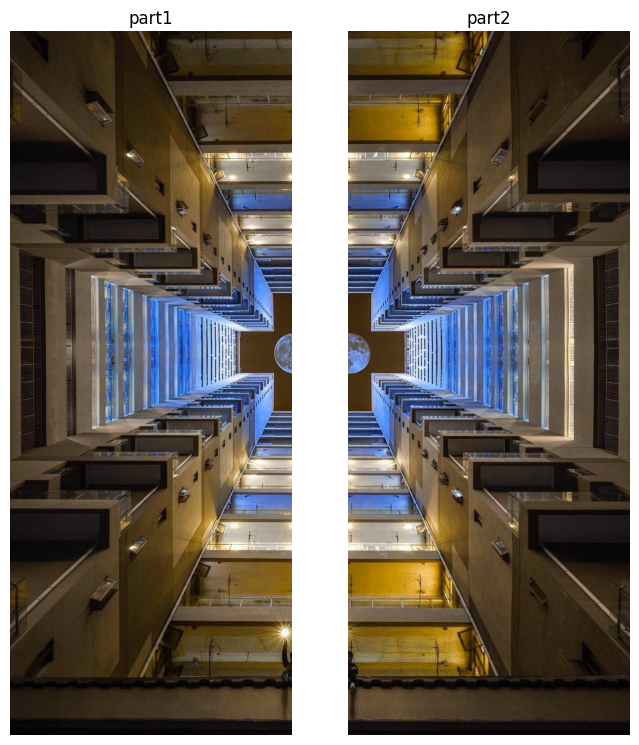

Not enough images for stitching


In [8]:
img1 = cv2.imread('Image1.jpg')
img2 = cv2.imread('Image2.jpg')
fig, ax = plt.subplots(1,2, figsize=(8,10))
ax[0].imshow(img1)
ax[0].set_title('part1')
ax[0].axis('off')
ax[1].imshow(img2)
ax[1].set_title('part2')
ax[1].axis('off')
plt.show()
stitcher = cv2.Stitcher_create()
status, stitched_img = stitcher.stitch((img1, img2))
if status == cv2.Stitcher_OK:
    ## Display the stitched image:
    plt.figure(figsize=(14,10))
    plt.imshow(stitched_img)
    plt.title("Stitched_Image")
    plt.show()
elif status == cv2.Stitcher_ERR_NEED_MORE_IMGS:
    print('Not enough images for stitching')
elif status == cv2.Stitcher_ERR_HOMOGRAPHY_EST_FAIL:
    print('Homography estimation failed')
else:
    print('Image stitching failed')
    